# Astrometric uncertainty models for Gaia DR3+

The code below illustrates the use of the astrometry uncertainty modules by producing basic plots of performance as a function of $G$-band magnitude.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pygaia.errors.astrometric import parallax_uncertainty, proper_motion_uncertainty

plt.style.use("./agab.mplstyle")

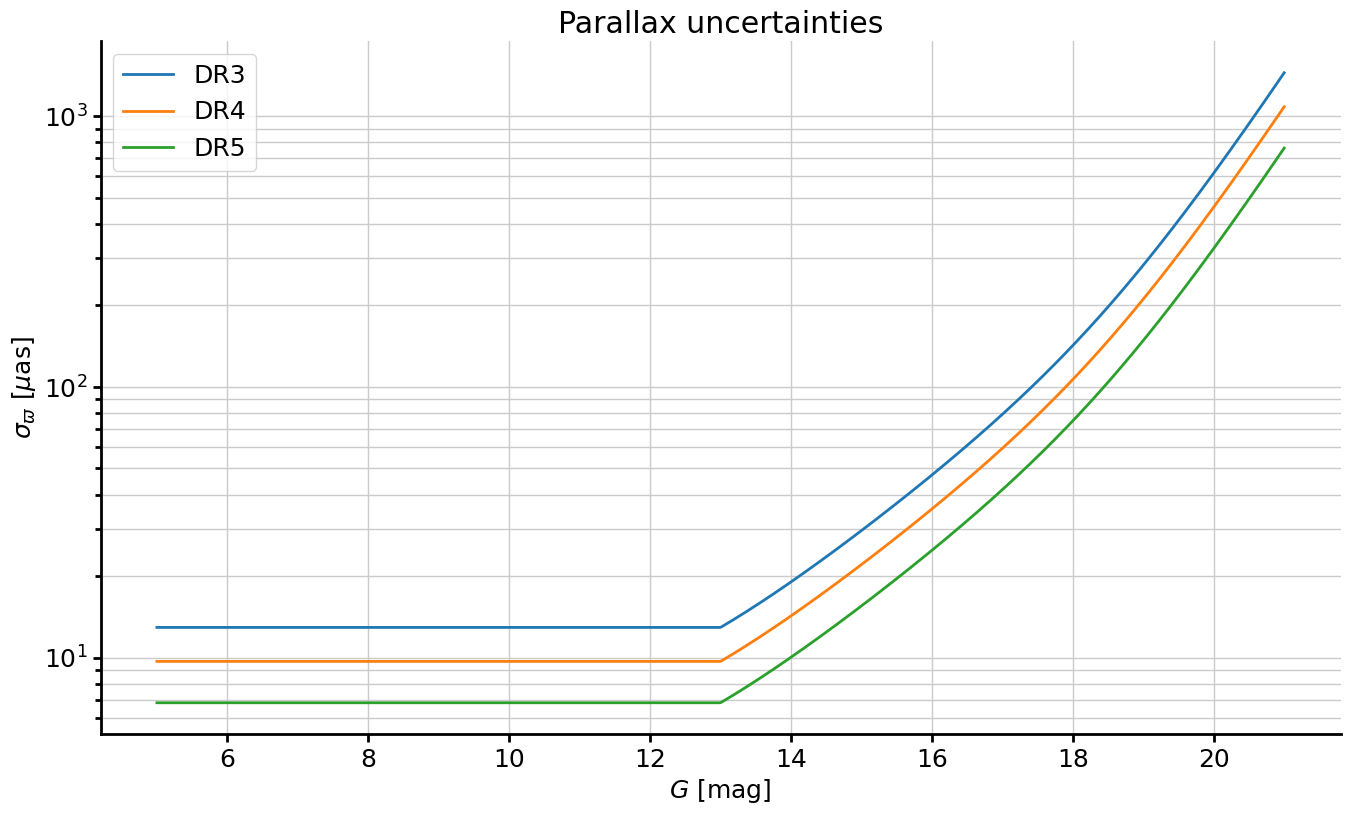

In [2]:
gmag = np.linspace(5, 21, 1000)

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

for rls in ["dr3", "dr4", "dr5"]:
    plx_unc = parallax_uncertainty(gmag, release=rls)
    ax.semilogy(gmag, plx_unc, label=rls.upper())
ax.grid(True, which="both")
ax.set_ylabel(r"$\sigma_\varpi$ [$\mu$as]")
ax.set_xlabel(r"$G$ [mag]")
ax.legend()
ax.set_title("Parallax uncertainties")

plt.show()

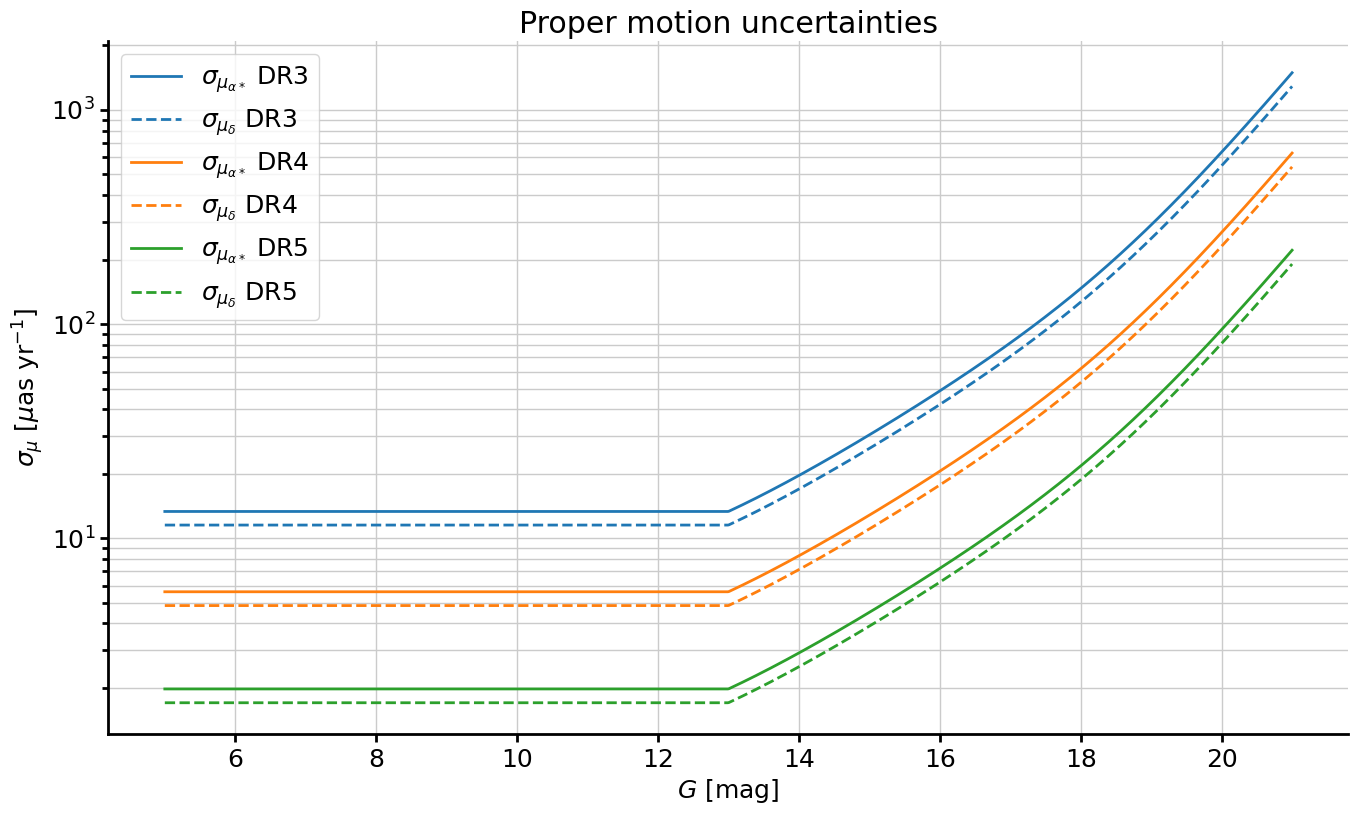

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

for rls, kleur in zip(["dr3", "dr4", "dr5"], ["C0", "C1", "C2"]):
    pmra_unc, pmdec_unc = proper_motion_uncertainty(gmag, release=rls)
    ax.semilogy(
        gmag, pmra_unc, c=kleur, label=rf"$\sigma_{{\mu_{{\alpha*}}}}$ {rls.upper()}"
    )
    ax.semilogy(
        gmag,
        pmdec_unc,
        ls="--",
        c=kleur,
        label=rf"$\sigma_{{\mu_\delta}}$ {rls.upper()}",
    )
ax.grid(True, which="both")
ax.set_ylabel(r"$\sigma_\mu$ [$\mu$as yr$^{-1}$]")
ax.set_xlabel(r"$G$ [mag]")
ax.legend()
ax.set_title("Proper motion uncertainties")

plt.show()